# Loading the Data

In [1]:
import joblib
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [2]:
# Setting the variables
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
loaded_rf = loaded_joblib['RandomForest']

# Preparing the Data for SHAP

In [3]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [4]:
# Creating the X_shap values
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
3888,15.85,1.0,0.110653,36.9506,0.760044,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,15.10,1.0,0.087407,221.8456,0.000000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7723,17.50,0.0,0.015592,184.8266,0.760044,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8117,10.80,0.0,0.049820,243.2144,0.760044,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7475,15.00,0.0,0.044999,140.4838,0.760044,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

# Fitting SHAP Explainer to Model

In [6]:
# Fitting explainer to model
explainer = shap.Explainer(loaded_rf)
explainer

In [7]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

### Summary Bar Plot

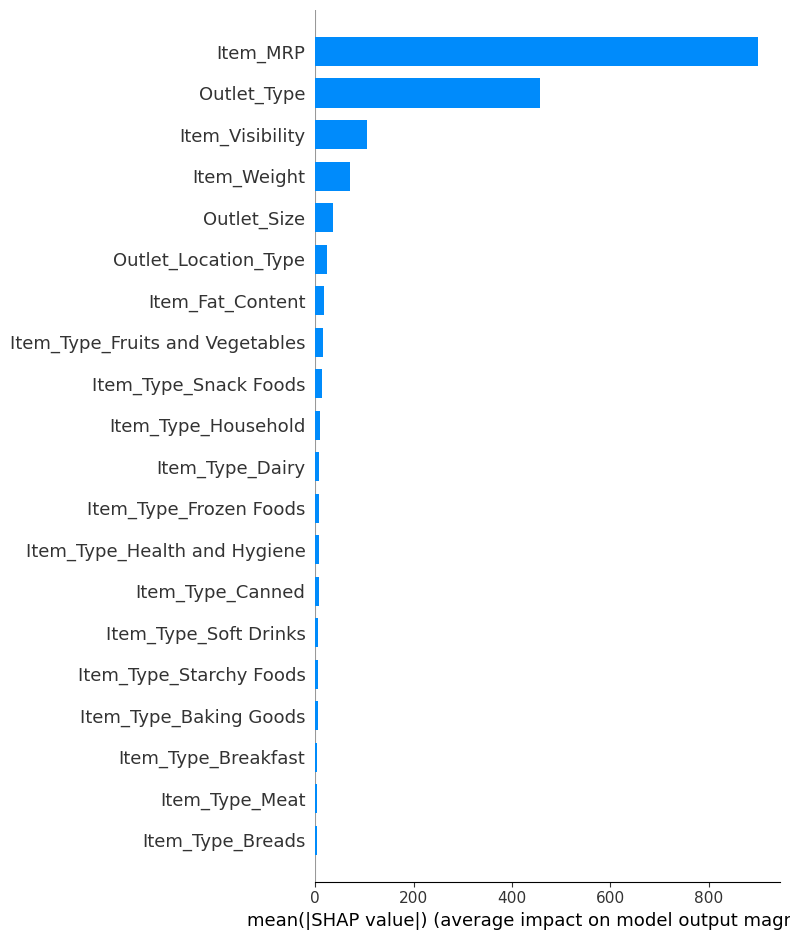

In [8]:
# Plotting a summary bar plot
shap.summary_plot(shap_values, features= X_train_df, plot_type='bar')

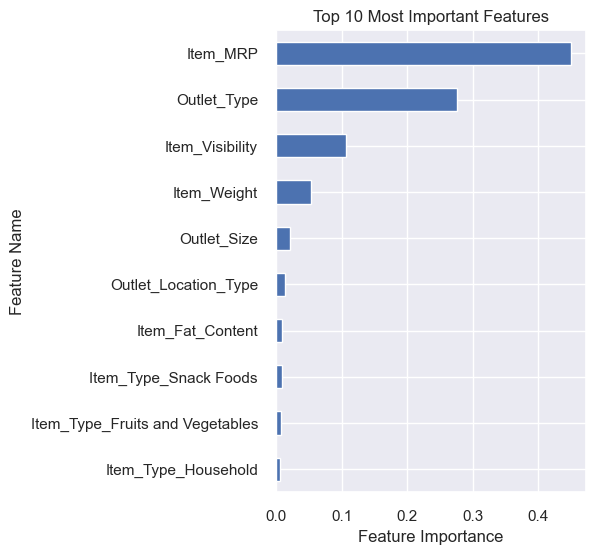

When it comes to these 2 bar plots, both Shap and the original Feature Importances have the same top 5 chosen importances.

### Summary Dot Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


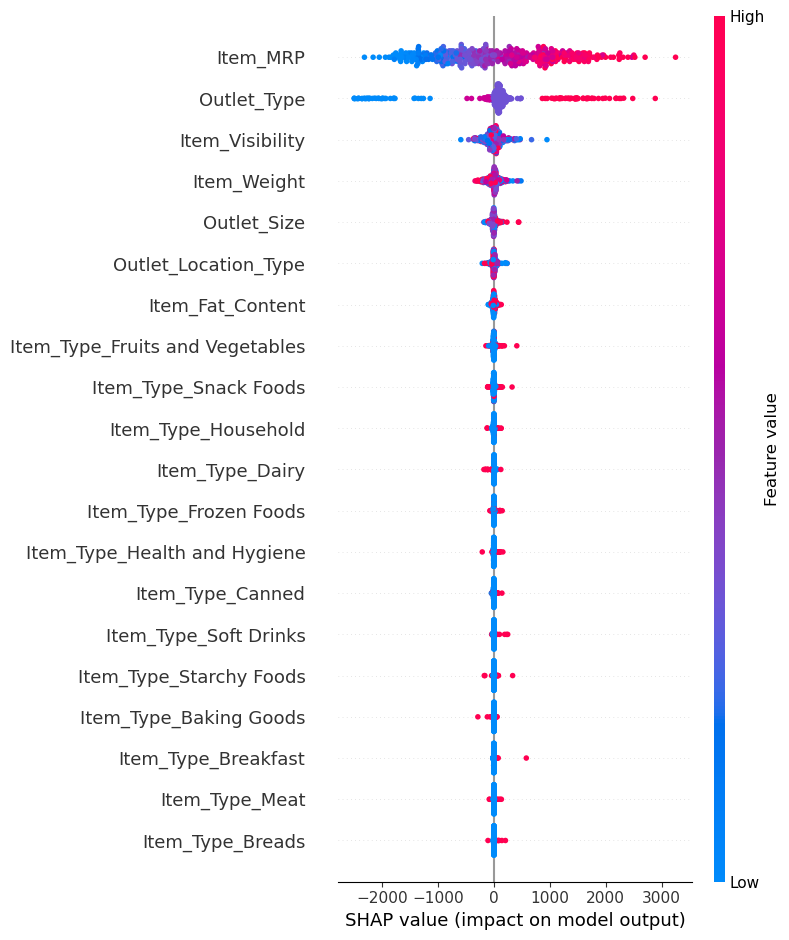

In [9]:
# Plotting a summary dot plot
shap.summary_plot(shap_values, X_shap)

**Top 3 Most Important Features:**

- **Item_MRP**
 - The Item Maximum Retail price positively influences the prediction of sales.
- **Outlet_Type**
 - Outlet Type positively influences the sales prediction.
- **Item_Visibility**
 - Item Visibility slightly negatively influenced the prediction of sales.

# Local Explanations

Looking over each of the Top 5 Features to select examples.

In [10]:
import seaborn as sns

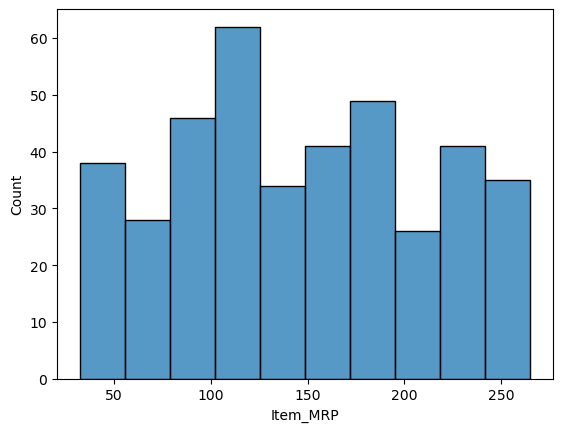

In [11]:
# Item_MRP
sns.histplot(X_shap['Item_MRP']);

Because just after 100 MRP is the largest bar, I will choose a row with something larger than 100.

In [12]:
# Saving filters where Item_MRP is over 100
filt_mrp = X_shap['Item_MRP'] > 100
filt_mrp.value_counts()

True     294
False    106
Name: Item_MRP, dtype: int64

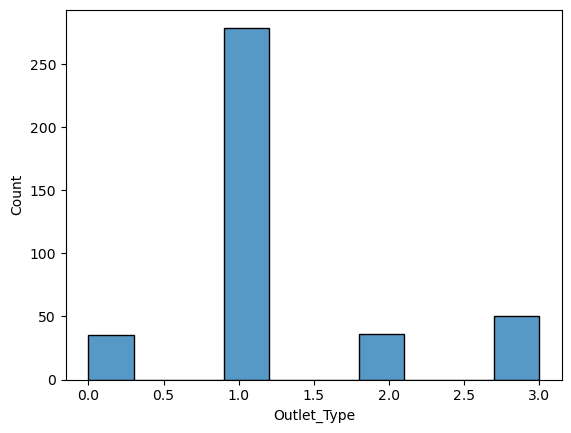

In [13]:
# Outlet_Type
sns.histplot(X_shap['Outlet_Type']);

In [14]:
# Saving Outlet_Type filter
filt_ot = X_shap['Outlet_Type'] <= 2
filt_ot.value_counts()

True     350
False     50
Name: Outlet_Type, dtype: int64

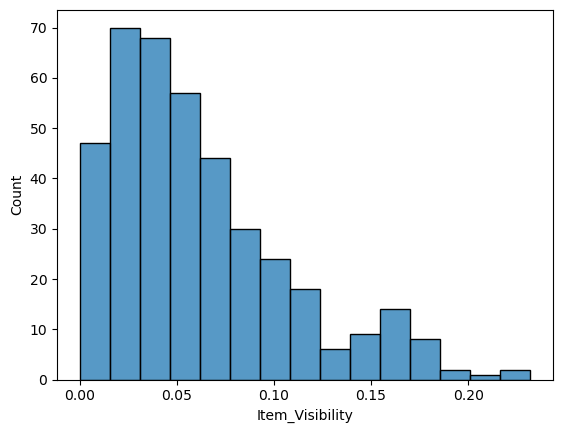

In [15]:
# Item_Visibility
sns.histplot(X_shap['Item_Visibility']);

In [16]:
# Saving Item_Visibility filter
filt_visibility = X_shap['Item_Visibility'] < 0.15
filt_visibility.value_counts()

True     370
False     30
Name: Item_Visibility, dtype: int64

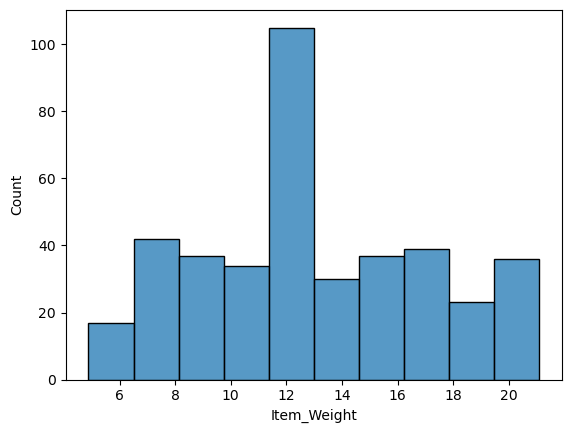

In [17]:
# Item_Weight
sns.histplot(X_shap['Item_Weight']);

In [18]:
# Saving Item_Weight filter
filt_weight = X_shap['Item_Weight'] < 16
filt_weight.value_counts()

True     290
False    110
Name: Item_Weight, dtype: int64

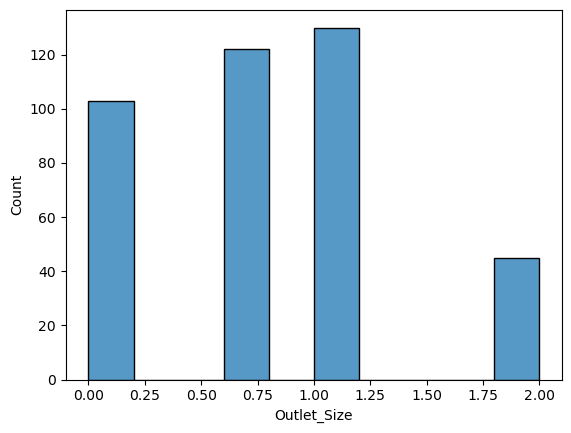

In [19]:
# Outlet_Size
sns.histplot(X_shap['Outlet_Size']);

In [20]:
# Saving Outlet_Size filter
filt_os = X_shap['Outlet_Size'] < 1
filt_os.value_counts()

True     225
False    175
Name: Outlet_Size, dtype: int64

## Group A:
- High Item_MRP
- Smaller Outlet_Type
- Low Item_Visibility
- Low Item Weight
- Smaller Outlet_Size

In [21]:
# Filtering for group A 
X_shap[filt_mrp & filt_ot & filt_visibility & filt_weight & filt_os]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
2497,15.100000,1.0,0.087407,221.8456,0.000000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8117,10.800000,0.0,0.049820,243.2144,0.760044,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7475,15.000000,0.0,0.044999,140.4838,0.760044,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,7.270000,0.0,0.071222,113.5518,0.760044,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
662,11.100000,0.0,0.111298,191.7846,0.760044,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,6.035000,1.0,0.065771,185.3240,0.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7748,12.904458,1.0,0.082341,185.7608,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6561,12.600000,1.0,0.031713,172.5764,0.760044,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3865,10.695000,1.0,0.101542,173.7712,0.760044,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
idx_example_A = 290
X_shap.loc[idx_example_A]

Item_Weight                          7.270000
Item_Fat_Content                     0.000000
Item_Visibility                      0.071222
Item_MRP                           113.551800
Outlet_Size                          0.760044
Outlet_Location_Type                 1.000000
Outlet_Type                          1.000000
Item_Type_Baking Goods               0.000000
Item_Type_Breads                     0.000000
Item_Type_Breakfast                  0.000000
Item_Type_Canned                     0.000000
Item_Type_Dairy                      0.000000
Item_Type_Frozen Foods               0.000000
Item_Type_Fruits and Vegetables      0.000000
Item_Type_Hard Drinks                0.000000
Item_Type_Health and Hygiene         0.000000
Item_Type_Household                  0.000000
Item_Type_Meat                       0.000000
Item_Type_Others                     0.000000
Item_Type_Seafood                    0.000000
Item_Type_Snack Foods                0.000000
Item_Type_Soft Drinks             

## Group B:
- High Item_MRP
- Smaller Outlet_Type
- Low Item_Visibility
- Low Item Weight
- Larger Outlet_Size|

In [23]:
# Filtering for group B
X_shap[filt_mrp & filt_ot & filt_visibility & filt_weight & ~filt_os]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
2270,7.655,0.0,0.031918,117.7492,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3481,9.130,0.0,0.051804,150.2024,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1150,11.500,1.0,0.037539,106.9254,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3574,15.700,1.0,0.027594,171.1790,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,8.100,0.0,0.127930,211.4902,2.0,2.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,12.350,0.0,0.000000,118.9124,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5585,8.945,1.0,0.088003,261.3910,1.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6711,7.020,0.0,0.081097,148.4734,2.0,2.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3035,8.895,1.0,0.088682,121.9730,1.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
idx_example_B = 365
X_shap.iloc[idx_example_B]

Item_Weight                         20.250000
Item_Fat_Content                     1.000000
Item_Visibility                      0.022639
Item_MRP                           248.409200
Outlet_Size                          0.760044
Outlet_Location_Type                 1.000000
Outlet_Type                          1.000000
Item_Type_Baking Goods               0.000000
Item_Type_Breads                     0.000000
Item_Type_Breakfast                  0.000000
Item_Type_Canned                     0.000000
Item_Type_Dairy                      1.000000
Item_Type_Frozen Foods               0.000000
Item_Type_Fruits and Vegetables      0.000000
Item_Type_Hard Drinks                0.000000
Item_Type_Health and Hygiene         0.000000
Item_Type_Household                  0.000000
Item_Type_Meat                       0.000000
Item_Type_Others                     0.000000
Item_Type_Seafood                    0.000000
Item_Type_Snack Foods                0.000000
Item_Type_Soft Drinks             

# Visualizing Individual SHAP for Selected Examples

In [27]:
import pandas as pd
y_pred = pd.Series(loaded_rf.predict(X_shap), index=X_shap.index)

## Group A

In [29]:
# Forceplot for group A
shap.force_plot(explainer.expected_value[1],
                shap_values=shap_vals_F[idx_example_A].values,
               features=X_shap.iloc[idx_example_A])

IndexError: index 1 is out of bounds for axis 0 with size 1